# Missing value imputation by mean. mediian 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# ya par google drive se data liya gya tha 
# vedio me dekho kaise lete h 

df =pd.read_csv("C:\\Users\\maury\\Desktop\\csv\\glo_data.csv")

In [3]:
df.shape

(3649, 21)

In [4]:
# pure data ko dekhne ke liye
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3649 entries, 0 to 3648
Data columns (total 21 columns):
 #   Column                                                            Non-Null Count  Dtype  
---  ------                                                            --------------  -----  
 0   Entity                                                            3649 non-null   object 
 1   Year                                                              3649 non-null   int64  
 2   Access to electricity (% of population)                           3639 non-null   float64
 3   Access to clean fuels for cooking                                 3480 non-null   float64
 4   Renewable-electricity-generating-capacity-per-capita              2718 non-null   float64
 5   Financial flows to developing countries (US $)                    1560 non-null   float64
 6   Renewable energy share in the total final energy consumption (%)  3455 non-null   float64
 7   Electricity from fossil fuels (TW

In [6]:
df.isnull().sum().sum()

6978

In [7]:
#parsentage of null value
miss_value_per = df.isnull().sum()/df.shape[0]*100
miss_value_per

Entity                                                               0.000000
Year                                                                 0.000000
Access to electricity (% of population)                              0.274048
Access to clean fuels for cooking                                    4.631406
Renewable-electricity-generating-capacity-per-capita                25.513839
Financial flows to developing countries (US $)                      57.248561
Renewable energy share in the total final energy consumption (%)     5.316525
Electricity from fossil fuels (TWh)                                  0.575500
Electricity from nuclear (TWh)                                       3.453001
Electricity from renewables (TWh)                                    0.575500
Low-carbon electricity (% electricity)                               1.151000
Primary energy consumption per capita (kWh/person)                   0.000000
Energy intensity level of primary energy (MJ/$2017 PPP GDP)     

In [8]:
#11 %se jada vale all clm
miss_value_clm_gre_11 = miss_value_per[miss_value_per > 11].keys()
miss_value_clm_gre_11

Index(['Renewable-electricity-generating-capacity-per-capita',
       'Financial flows to developing countries (US $)',
       'Value_co2_emissions_kt_by_country',
       'Renewables (% equivalent primary energy)'],
      dtype='object')

In [9]:
df2_drop_clm = df.drop(columns = miss_value_clm_gre_11)
df2_drop_clm.shape

(3649, 17)

In [10]:
df3_num = df2_drop_clm.select_dtypes(include =['int64','float64'])
df3_num.head()

Year  Access to electricity (% of population)  \
0  2000                                 1.613591   
1  2001                                 4.074574   
2  2002                                 9.409158   
3  2003                                14.738506   
4  2004                                20.064968   

   Access to clean fuels for cooking  \
0                                6.2   
1                                7.2   
2                                8.2   
3                                9.5   
4                               10.9   

   Renewable energy share in the total final energy consumption (%)  \
0                                              44.99                  
1                                              45.60                  
2                                              37.83                  
3                                              36.66                  
4                                              44.24                  

   Electricity from fossil fuels (TWh)  Electricity from nuclear (TWh)  \
0                                 0.16                             0.0   
1                                 0.09                             0.0   
2                                 0.13                             0.0   
3                                 0.31                             0.0   
4                                 0.33                             0.0   

   Electricity from renewables (TWh)  Low-carbon electricity (% electricity)  \
0                               0.31                               65.957440   
1                               0.50                               84.745766   
2                               0.56                               81.159424   
3                               0.63                               67.021280   
4                               0.56                               62.921350   

   Primary energy consumption per capita (kWh/person)  \
0                                          302.59482    
1                                          236.89185    
2                                          210.86215    
3                                          229.96822    
4                                          204.23125    

   Energy intensity level of primary energy (MJ/$2017 PPP GDP)  gdp_growth  \
0                                               1.64                   NaN   
1                                               1.74                   NaN   
2                                               1.40                   NaN   
3                                               1.40              8.832278   
4                                               1.20              1.414118   

   gdp_per_capita  Land Area(Km2)  Latitude  Longitude  
0             NaN        652230.0  33.93911  67.709953  
1             NaN        652230.0  33.93911  67.709953  
2      179.426579        652230.0  33.93911  67.709953  
3      190.683814        652230.0  33.93911  67.709953  
4      211.382074        652230.0  33.93911  67.709953

<Axes: >

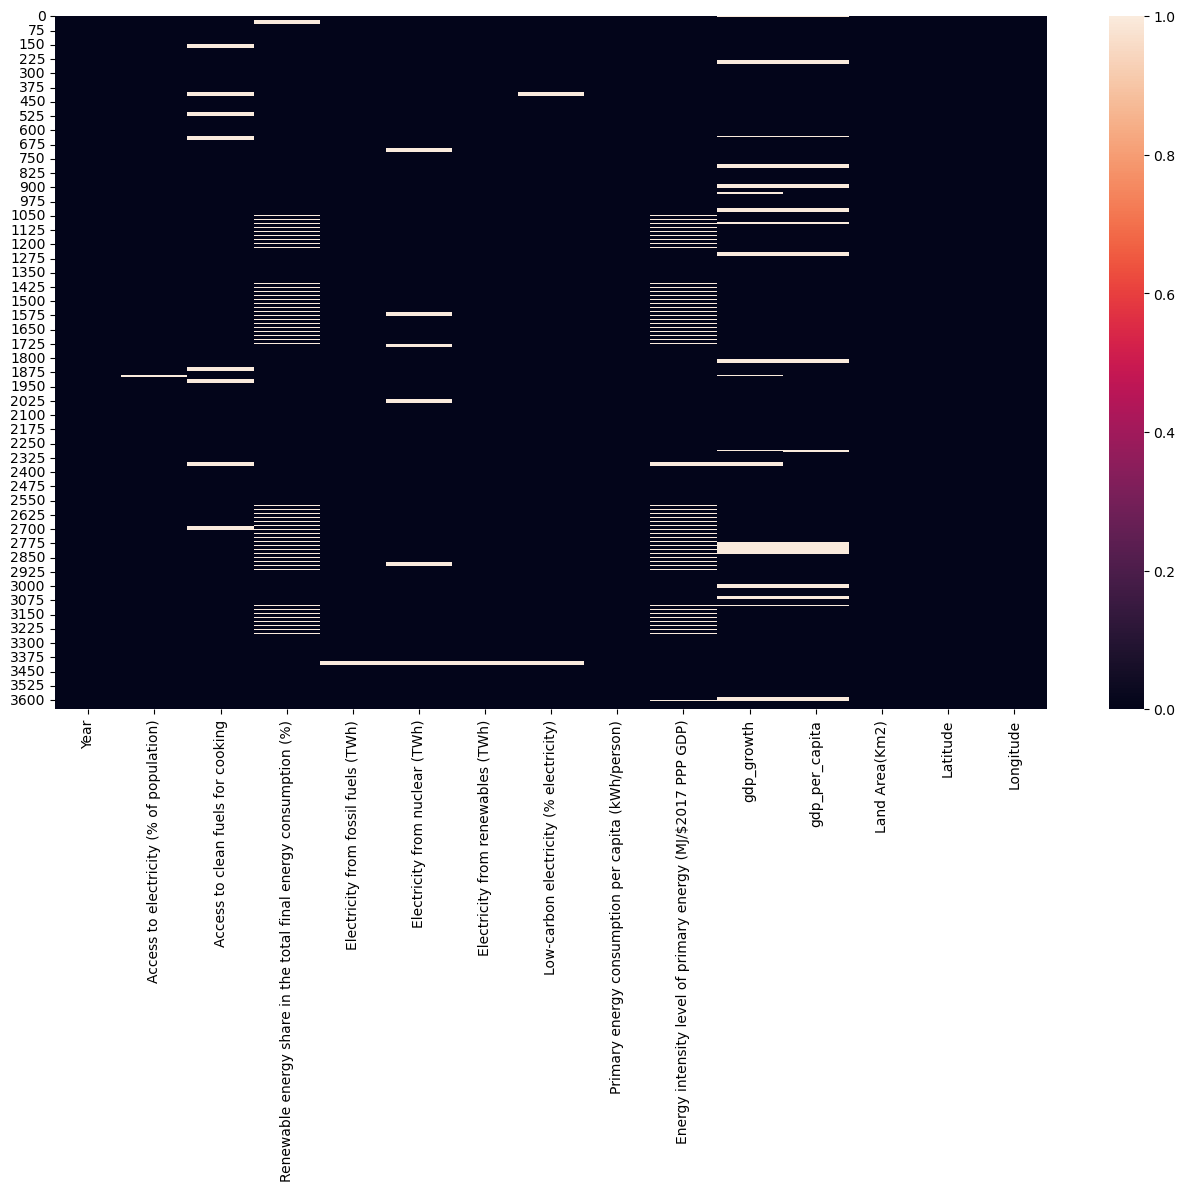

In [11]:
plt.figure(figsize =(16,9))
sns.heatmap(df3_num.isnull()) #jaha black(flase)and white(true)

In [12]:
df3_num[df3_num.isnull().any(axis = 1)]

Year  Access to electricity (% of population)  \
0     2000                                 1.613591   
1     2001                                 4.074574   
2     2002                                 9.409158   
20    2020                                97.700000   
21    2000                               100.000000   
22    2001                               100.000000   
23    2002                               100.000000   
24    2003                               100.000000   
25    2004                               100.000000   
26    2005                               100.000000   
27    2006                               100.000000   
28    2007                               100.000000   
29    2008                               100.000000   
30    2009                               100.000000   
31    2010                               100.000000   
32    2011                               100.000000   
33    2012                                99.900000   
34    2013                               100.000000   
35    2014                                99.950000   
36    2015                                99.980000   
37    2016                                99.890000   
38    2017                                99.890000   
39    2018                               100.000000   
40    2019                               100.000000   
41    2020                               100.000000   
62    2020                                99.804130   
83    2020                                46.890610   
104   2020                               100.000000   
125   2020                               100.000000   
146   2020                               100.000000   
147   2000                                91.660400   
148   2001                               100.000000   
149   2002                               100.000000   
150   2003                               100.000000   
151   2004                               100.000000   
152   2005                               100.000000   
153   2006                               100.000000   
154   2007                               100.000000   
155   2008                               100.000000   
156   2009                               100.000000   
157   2010                                93.356290   
158   2011                               100.000000   
159   2012                               100.000000   
160   2013                               100.000000   
161   2014                               100.000000   
162   2015                               100.000000   
163   2016                               100.000000   
164   2017                               100.000000   
165   2018                               100.000000   
166   2019                               100.000000   
167   2020                               100.000000   
188   2020                               100.000000   
209   2020                               100.000000   
230   2020                               100.000000   
231   2000                               100.000000   
232   2001                               100.000000   
233   2002                               100.000000   
234   2003                               100.000000   
235   2004                               100.000000   
236   2005                               100.000000   
237   2006                               100.000000   
238   2007                               100.000000   
239   2008                               100.000000   
240   2009                               100.000000   
241   2010                               100.000000   
242   2011                               100.000000   
243   2012                               100.000000   
244   2013                               100.000000   
245   2014                               100.000000   
246   2015                               100.000000   
247   2016                               100.000000   
248   2017                               100.0

In [13]:
df3_num.isnull().sum().sum()

1392

In [14]:
miss_num_var = [var for var in df3_num.columns if df3_num[var].isnull().sum() > 0]
miss_num_var


['Access to electricity (% of population)',
 'Access to clean fuels for cooking',
 'Renewable energy share in the total final energy consumption (%)',
 'Electricity from fossil fuels (TWh)',
 'Electricity from nuclear (TWh)',
 'Electricity from renewables (TWh)',
 'Low-carbon electricity (% electricity)',
 'Energy intensity level of primary energy (MJ/$2017 PPP GDP)',
 'gdp_growth',
 'gdp_per_capita',
 'Land Area(Km2)',
 'Latitude',
 'Longitude']

C:\Users\maury\AppData\Local\Temp\ipykernel_8216\84242724.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df3_num[var],bins =20 ,kde_kws ={'linewidth':5,'color' :'#DC143C'})
C:\Users\maury\AppData\Local\Temp\ipykernel_8216\84242724.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df3_num[

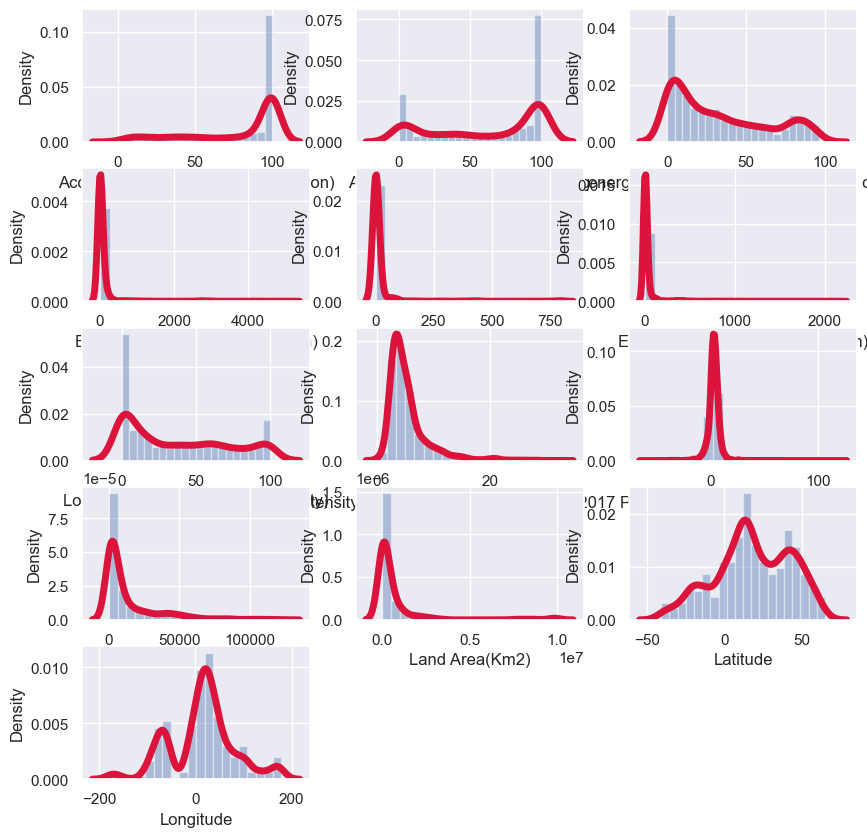

In [15]:
plt.figure(figsize =(10,10))
sns.set()
for i, var in enumerate(miss_num_var):
    plt.subplot(5,3, i+1)# rows and columns
    sns.distplot(df3_num[var],bins =20 ,kde_kws ={'linewidth':5,'color' :'#DC143C'})

In [16]:
#original dat me missing value ki jagah mean fil kiya h
df4_num_mean = df3_num.fillna(df3_num.mean())
df4_num_mean.isnull().sum().sum() # is time data frame me koi bhi missing value nhi h

0

C:\Users\maury\AppData\Local\Temp\ipykernel_8216\2560196606.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df3_num[var],bins=11 , kde_kws ={'linewidth':8, 'color':'red'},label ='Original')
C:\Users\maury\AppData\Local\Temp\ipykernel_8216\2560196606.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns

C:\Users\maury\AppData\Local\Temp\ipykernel_8216\2560196606.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df4_num_mean[var],bins=11 , kde_kws ={'linewidth':8, 'color':'green'},label ='Mean' )
C:\Users\maury\AppData\Local\Temp\ipykernel_8216\2560196606.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

 

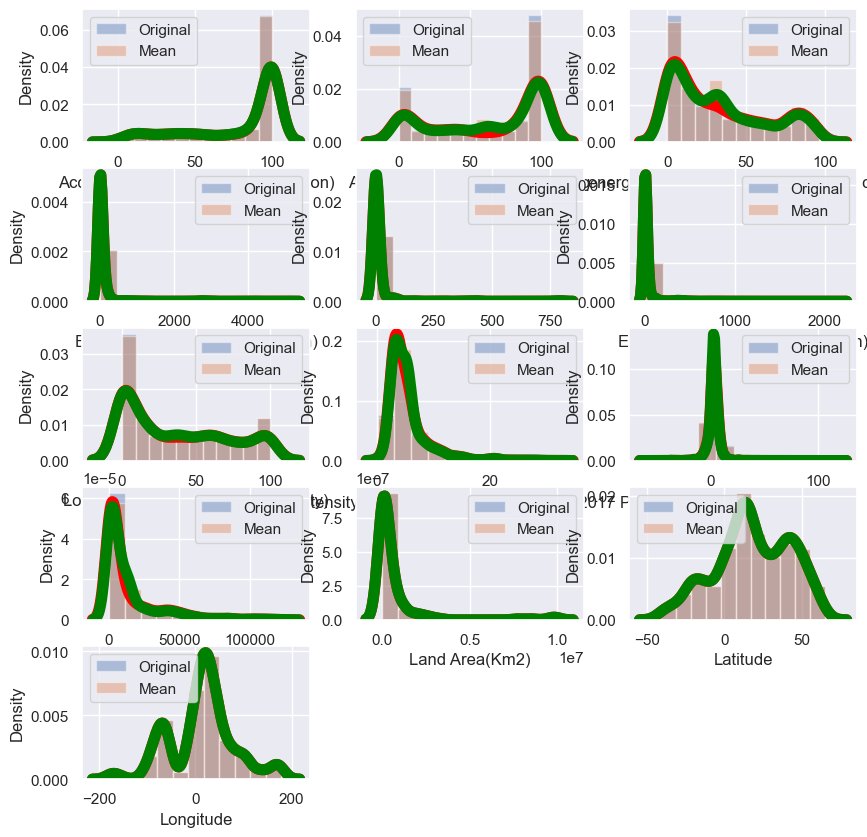

In [17]:
plt.figure(figsize =(10,10))
sns.set()
for i, var in enumerate(miss_num_var):
    plt.subplot(5,3,i+1)
    sns.distplot(df3_num[var],bins=11 , kde_kws ={'linewidth':8, 'color':'red'},label ='Original')
    sns.distplot(df4_num_mean[var],bins=11 , kde_kws ={'linewidth':8, 'color':'green'},label ='Mean' )     
    plt.legend()             

In [18]:
#original dat me missing value ki jagah median fil kiya h
df5_num_median = df3_num.fillna(df3_num.median())
df5_num_median.isnull().sum().sum() # is time data frame me koi bhi missing value nhi h

0

C:\Users\maury\AppData\Local\Temp\ipykernel_8216\2891565908.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df3_num[var],bins=11 ,hist =False, kde_kws ={'linewidth':8, 'color':'red'},label ='Original')
C:\Users\maury\AppData\Local\Temp\ipykernel_8216\2891565908.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed

C:\Users\maury\AppData\Local\Temp\ipykernel_8216\2891565908.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df3_num[var],bins=11 ,hist =False, kde_kws ={'linewidth':8, 'color':'red'},label ='Original')
C:\Users\maury\AppData\Local\Temp\ipykernel_8216\2891565908.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed

C:\Users\maury\AppData\Local\Temp\ipykernel_8216\2891565908.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df4_num_mean[var],bins=11 ,hist =False, kde_kws ={'linewidth':8, 'color':'green'},label ='Mean' )
C:\Users\maury\AppData\Local\Temp\ipykernel_8216\2891565908.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de441

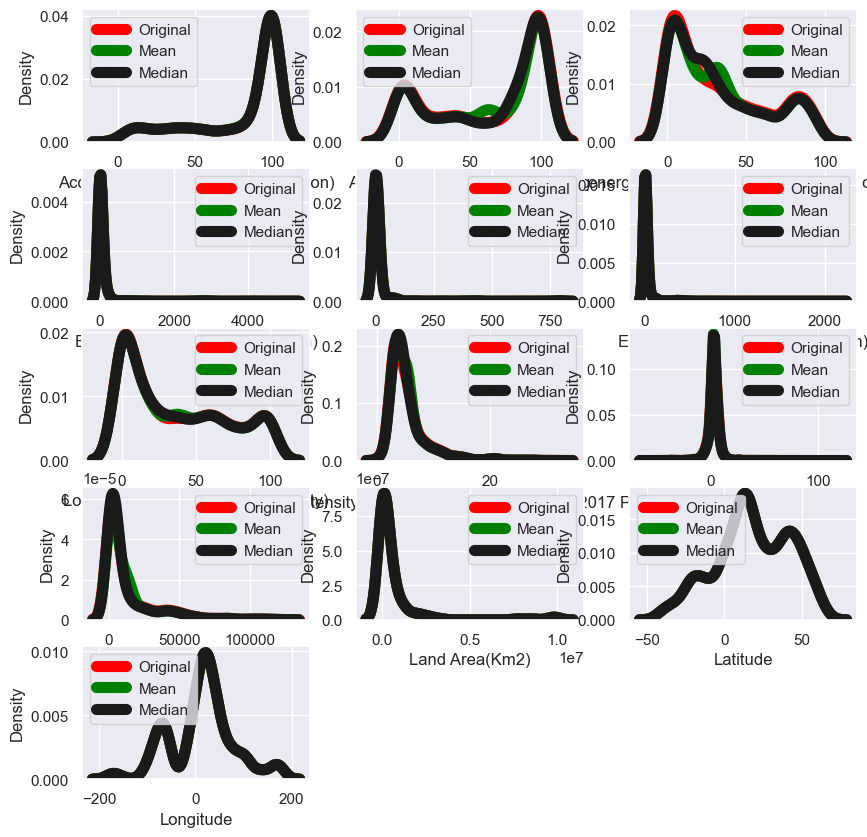

In [19]:
plt.figure(figsize =(10,10))
sns.set()
for i, var in enumerate(miss_num_var):
    plt.subplot(5,3,i+1)
    sns.distplot(df3_num[var],bins=11 ,hist =False, kde_kws ={'linewidth':8, 'color':'red'},label ='Original')
    sns.distplot(df4_num_mean[var],bins=11 ,hist =False, kde_kws ={'linewidth':8, 'color':'green'},label ='Mean' )  
    sns.distplot(df5_num_median[var],bins=11 ,hist =False, kde_kws ={'linewidth':8, 'color':'k'},label ='Median' )     
    plt.legend()             

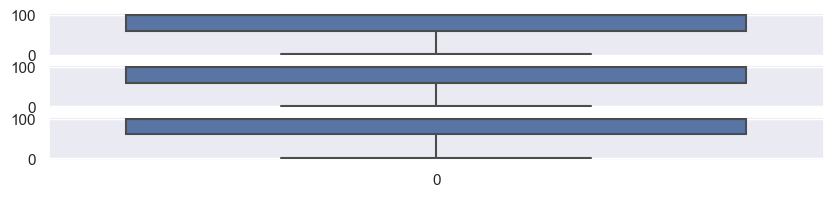

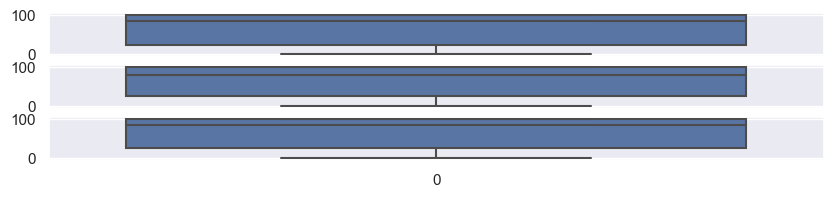

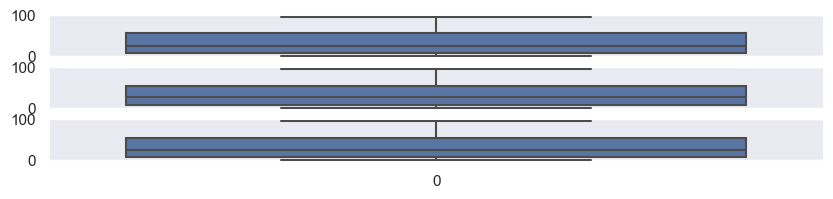

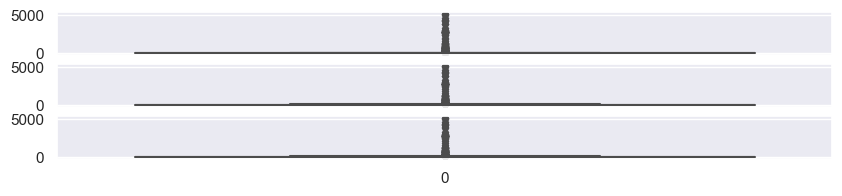

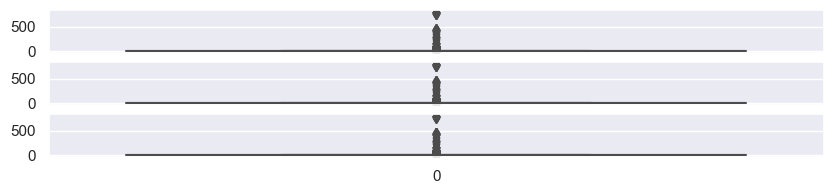

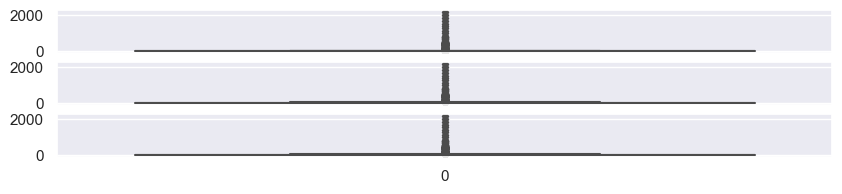

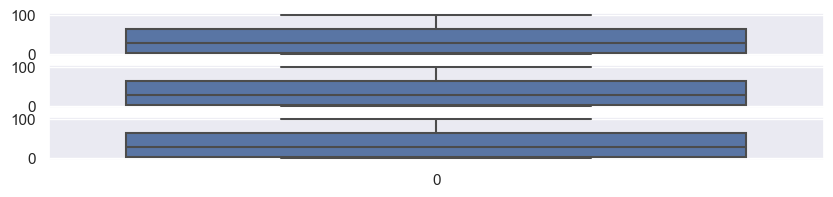

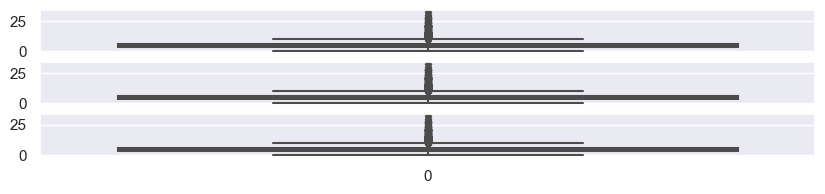

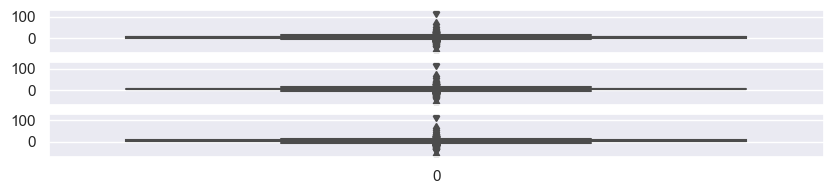

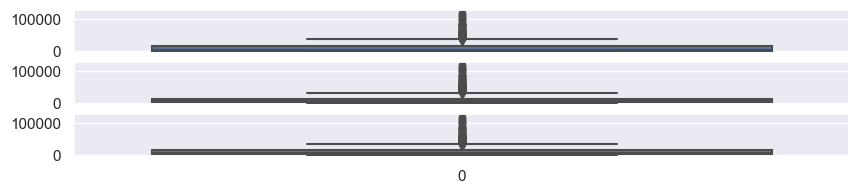

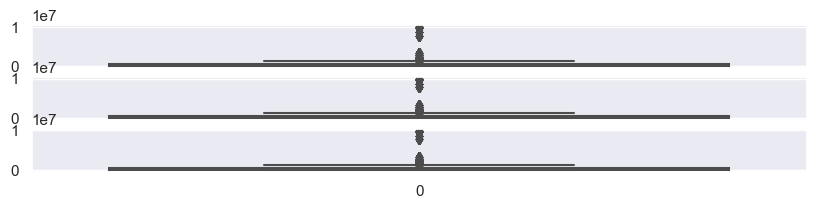

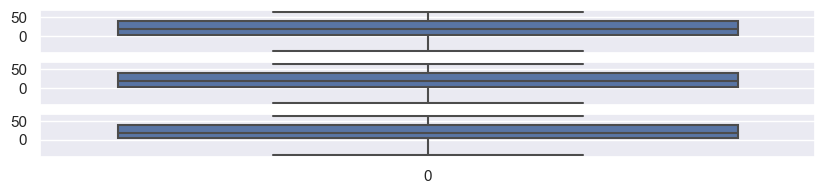

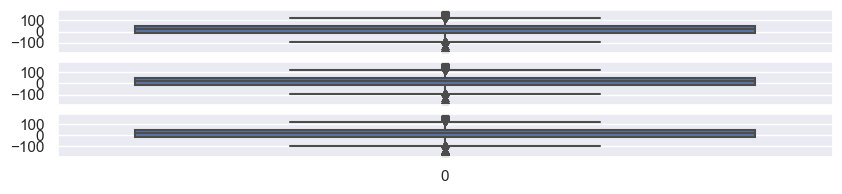

In [20]:
for  i,var in enumerate(miss_num_var):
    plt.figure(figsize =(10,10))
    plt.subplot(15,1 ,1)
    sns.boxplot(df[var])
    plt.subplot(15,1,2)
    sns.boxplot(df4_num_mean[var])
    plt.subplot(15,1,3)
    sns.boxplot(df5_num_median[var])
    
    
    
    

In [21]:
df_concat =pd.concat([df3_num[miss_num_var],df4_num_mean[miss_num_var],df5_num_median[miss_num_var]],axis =1)


In [22]:
df_concat[df_concat.isnull().any(axis =1)]

Access to electricity (% of population)  \
0                                    1.613591   
1                                    4.074574   
2                                    9.409158   
20                                  97.700000   
21                                 100.000000   
22                                 100.000000   
23                                 100.000000   
24                                 100.000000   
25                                 100.000000   
26                                 100.000000   
27                                 100.000000   
28                                 100.000000   
29                                 100.000000   
30                                 100.000000   
31                                 100.000000   
32                                 100.000000   
33                                  99.900000   
34                                 100.000000   
35                                  99.950000   
36                                  99.980000   
37                                  99.890000   
38                                  99.890000   
39                                 100.000000   
40                                 100.000000   
41                                 100.000000   
62                                  99.804130   
83                                  46.890610   
104                                100.000000   
125                                100.000000   
146                                100.000000   
147                                 91.660400   
148                                100.000000   
149                                100.000000   
150                                100.000000   
151                                100.000000   
152                                100.000000   
153                                100.000000   
154                                100.000000   
155                                100.000000   
156                                100.000000   
157                                 93.356290   
158                                100.000000   
159                                100.000000   
160                                100.000000   
161                                100.000000   
162                                100.000000   
163                                100.000000   
164                                100.000000   
165                                100.000000   
166                                100.000000   
167                                100.000000   
188                                100.000000   
209                                100.000000   
230                                100.000000   
231                                100.000000   
232                                100.000000   
233                                100.000000   
234                                100.000000   
235                                100.000000   
236                                100.000000   
237                                100.000000   
238                                100.000000   
239                                100.000000   
240                                100.000000   
241                                100.000000   
242                                100.000000   
243                                100.000000   
244                                100.000000   
245                                100.000000   
246                                100.000000   
247                                100.000000   
248                                100.000000   
249                                100.000000   
250                                100.000000   
251                                100.000000   
272                                100.000000   
293                                 96.200000   
314                                100.000000   
335                                100.000000   
356                                100.000000   
377                                 9

# Numeric missing value imputatuion by class

In [23]:
df3_num = df2_drop_clm.select_dtypes(include =['int64','float64'])
df3_num.head()

Year  Access to electricity (% of population)  \
0  2000                                 1.613591   
1  2001                                 4.074574   
2  2002                                 9.409158   
3  2003                                14.738506   
4  2004                                20.064968   

   Access to clean fuels for cooking  \
0                                6.2   
1                                7.2   
2                                8.2   
3                                9.5   
4                               10.9   

   Renewable energy share in the total final energy consumption (%)  \
0                                              44.99                  
1                                              45.60                  
2                                              37.83                  
3                                              36.66                  
4                                              44.24                  

   Electricity from fossil fuels (TWh)  Electricity from nuclear (TWh)  \
0                                 0.16                             0.0   
1                                 0.09                             0.0   
2                                 0.13                             0.0   
3                                 0.31                             0.0   
4                                 0.33                             0.0   

   Electricity from renewables (TWh)  Low-carbon electricity (% electricity)  \
0                               0.31                               65.957440   
1                               0.50                               84.745766   
2                               0.56                               81.159424   
3                               0.63                               67.021280   
4                               0.56                               62.921350   

   Primary energy consumption per capita (kWh/person)  \
0                                          302.59482    
1                                          236.89185    
2                                          210.86215    
3                                          229.96822    
4                                          204.23125    

   Energy intensity level of primary energy (MJ/$2017 PPP GDP)  gdp_growth  \
0                                               1.64                   NaN   
1                                               1.74                   NaN   
2                                               1.40                   NaN   
3                                               1.40              8.832278   
4                                               1.20              1.414118   

   gdp_per_capita  Land Area(Km2)  Latitude  Longitude  
0             NaN        652230.0  33.93911  67.709953  
1             NaN        652230.0  33.93911  67.709953  
2      179.426579        652230.0  33.93911  67.709953  
3      190.683814        652230.0  33.93911  67.709953  
4      211.382074        652230.0  33.93911  67.709953

In [24]:
df3_num = df2_drop_clm.select_dtypes(include =['int64','float64'])
df3_num.head().shape

(5, 15)

In [25]:
df3_num.isnull().sum()

Year                                                                  0
Access to electricity (% of population)                              10
Access to clean fuels for cooking                                   169
Renewable energy share in the total final energy consumption (%)    194
Electricity from fossil fuels (TWh)                                  21
Electricity from nuclear (TWh)                                      126
Electricity from renewables (TWh)                                    21
Low-carbon electricity (% electricity)                               42
Primary energy consumption per capita (kWh/person)                    0
Energy intensity level of primary energy (MJ/$2017 PPP GDP)         207
gdp_growth                                                          317
gdp_per_capita                                                      282
Land Area(Km2)                                                        1
Latitude                                                        

In [26]:
#jisme null value h usko dekhne liye
num_var_miss= ['Access to electricity (% of population)',
 'Access to clean fuels for cooking',
 'Renewable energy share in the total final energy consumption (%)',
 'Electricity from fossil fuels (TWh)',
 'Electricity from nuclear (TWh)',
 'Electricity from renewables (TWh)',
 'Low-carbon electricity (% electricity)',
 'Energy intensity level of primary energy (MJ/$2017 PPP GDP)',
 'gdp_growth',
 'gdp_per_capita',
 'Land Area(Km2)',
 'Latitude',
 'Longitude']
df3_num[num_var_miss][df3_num[num_var_miss].isnull().any(axis =1)]

Access to electricity (% of population)  \
0                                    1.613591   
1                                    4.074574   
2                                    9.409158   
20                                  97.700000   
21                                 100.000000   
22                                 100.000000   
23                                 100.000000   
24                                 100.000000   
25                                 100.000000   
26                                 100.000000   
27                                 100.000000   
28                                 100.000000   
29                                 100.000000   
30                                 100.000000   
31                                 100.000000   
32                                 100.000000   
33                                  99.900000   
34                                 100.000000   
35                                  99.950000   
36                                  99.980000   
37                                  99.890000   
38                                  99.890000   
39                                 100.000000   
40                                 100.000000   
41                                 100.000000   
62                                  99.804130   
83                                  46.890610   
104                                100.000000   
125                                100.000000   
146                                100.000000   
147                                 91.660400   
148                                100.000000   
149                                100.000000   
150                                100.000000   
151                                100.000000   
152                                100.000000   
153                                100.000000   
154                                100.000000   
155                                100.000000   
156                                100.000000   
157                                 93.356290   
158                                100.000000   
159                                100.000000   
160                                100.000000   
161                                100.000000   
162                                100.000000   
163                                100.000000   
164                                100.000000   
165                                100.000000   
166                                100.000000   
167                                100.000000   
188                                100.000000   
209                                100.000000   
230                                100.000000   
231                                100.000000   
232                                100.000000   
233                                100.000000   
234                                100.000000   
235                                100.000000   
236                                100.000000   
237                                100.000000   
238                                100.000000   
239                                100.000000   
240                                100.000000   
241                                100.000000   
242                                100.000000   
243                                100.000000   
244                                100.000000   
245                                100.000000   
246                                100.000000   
247                                100.000000   
248                                100.000000   
249                                100.000000   
250                                100.000000   
251                                100.000000   
272                                100.000000   
293                                 96.200000   
314                                100.000000   
335                                100.000000   
356                                100.000000   
377                                 9

# class mathodka use karne ke liye domain ka kwonladge hona important h 
isme  dekhte h ki kon kon se  colum apasme belong kar rhe h 
pir usi ke acoording value ko fill karte h 
data claning ko detail ke use kane ke liye vedio ka help hoga 
thankyou